**R1 Format**

`[16bp cell barcode] -> [10bp UMI] -> [2bp ignore]`

**R2 Format**

`[8bp idk] -> [30bp A] -> [nbp coding seq]`

**Strategy**
1. Read pairs of lines at index `1+4i` (zero indexing)
2. For each pair, slice up lines based on structure and compose object/dictionary
3. Place within array within a dictionary using cell id as a key
4. Serialize and write to file

Everything should fit in the RAM (combined files are <1gb)

In [14]:
# OLD APPROACH FOR READING THE TXT BARCODES FROM 10X
# white = []
# with open('737K-whitelist.txt') as wl:
#     for line in enumerate(wl):
#         code = line[1]
#         a = code[:-1]
#         white.append(a)

In [28]:
# READ THE BARCODES FROM THE CELLRANGER TSV FILE
import pandas as pd
wl = pd.read_csv('barcodes.tsv',sep='\t',header=None)
wl.columns = ['a']
white = wl.a.tolist()
white = [v[:-2] for v in white]

In [39]:
# PARSE THE CELLS
from tqdm.notebook import tqdm
cells = {} # store the data in a dictionary of arrays
# Read lines from the file
with open('HCC_AA_MS_S6_L001_R1_001.fastq') as r1File, open('HCC_AA_MS_S6_L001_R2_001.fastq') as r2File:
    for i, val in tqdm(enumerate(zip(r1File,r2File))):
        if (i-1)%4 == 0: # Only interested in the sequence lines
            r1 = val[0]
            r2 = val[1]
            
            # Get the pieces of interest
            cell = r1[0:16]
            UMI = r1[17:27]
            multiseq = r2[0:8]
            coding = r2[38:]
            
            read = {}
            read['umi'] = UMI
            read['multiseq'] = multiseq
            read['coding'] = coding
            if cell in white:
                
                if cell not in cells:
                    cells[cell] = []

                cells[cell].append(read)


0it [00:00, ?it/s]
4882it [00:00, 48778.53it/s]
9582it [00:00, 48229.95it/s]
14354it [00:00, 48064.93it/s]
19218it [00:00, 48226.55it/s]
24686it [00:00, 49987.14it/s]
29822it [00:00, 50384.28it/s]
34906it [00:00, 50516.81it/s]
39818it [00:00, 50085.97it/s]
44602it [00:00, 49386.24it/s]
50354it [00:01, 51565.24it/s]
55403it [00:01, 50068.13it/s]
60344it [00:01, 48995.35it/s]
65203it [00:01, 48142.77it/s]
69992it [00:01, 47686.85it/s]
74744it [00:01, 46801.35it/s]
79417it [00:01, 46210.07it/s]
84326it [00:01, 47032.50it/s]
89326it [00:01, 47879.46it/s]
94154it [00:01, 47984.20it/s]
99218it [00:02, 48741.80it/s]
104358it [00:02, 49500.61it/s]
110130it [00:02, 51709.54it/s]
115374it [00:02, 51915.89it/s]
120587it [00:02, 50472.83it/s]
125658it [00:02, 49097.10it/s]
130766it [00:02, 49668.54it/s]
135806it [00:02, 49879.93it/s]
140946it [00:02, 50319.67it/s]
146214it [00:02, 51001.07it/s]
151324it [00:03, 49335.79it/s]
156277it [00:03, 48246.69it/s]
161226it [00:03, 48608.34it/s]
166238it [

2991074it [00:49, 63046.63it/s]
2997862it [00:50, 64412.14it/s]
3004694it [00:50, 65535.95it/s]
3011486it [00:50, 66231.34it/s]
3018362it [00:50, 66960.18it/s]
3025075it [00:50, 66884.08it/s]
3031954it [00:50, 67435.56it/s]
3038707it [00:50, 67050.27it/s]
3045420it [00:50, 66577.83it/s]
3052084it [00:50, 66338.11it/s]
3058722it [00:50, 65932.34it/s]
3065514it [00:51, 66506.88it/s]
3072169it [00:51, 65680.24it/s]
3078742it [00:51, 64657.04it/s]
3085570it [00:51, 65700.61it/s]
3092378it [00:51, 66388.05it/s]
3099090it [00:51, 66595.62it/s]
3105756it [00:51, 65987.02it/s]
3112361it [00:51, 65534.96it/s]
3118919it [00:51, 65399.43it/s]
3125742it [00:51, 66220.94it/s]
3132478it [00:52, 66551.08it/s]
3139554it [00:52, 67752.68it/s]
3146426it [00:52, 68025.43it/s]
3153235it [00:52, 67974.26it/s]
3160037it [00:52, 66548.60it/s]
3166702it [00:52, 66119.67it/s]
3173322it [00:52, 66092.29it/s]
3179937it [00:52, 65946.08it/s]
3186606it [00:52, 66164.76it/s]
3193226it [00:52, 65539.87it/s]
3199784i

5834547it [01:39, 67370.10it/s]
5841302it [01:39, 56713.52it/s]
5847273it [01:39, 52230.32it/s]
5852776it [01:39, 49899.90it/s]
5857984it [01:40, 48210.63it/s]
5863562it [01:40, 50245.32it/s]
5869546it [01:40, 52783.62it/s]
5875542it [01:40, 54748.10it/s]
5881138it [01:40, 55100.24it/s]
5887046it [01:40, 56230.60it/s]
5892886it [01:40, 56850.70it/s]
5898706it [01:40, 57242.45it/s]
5904554it [01:40, 57603.08it/s]
5910966it [01:40, 59411.40it/s]
5917082it [01:41, 59918.35it/s]
5923398it [01:41, 60851.31it/s]
5929606it [01:41, 61211.34it/s]
5935878it [01:41, 61653.33it/s]
5942054it [01:41, 60444.51it/s]
5948322it [01:41, 61097.31it/s]
5954443it [01:41, 58542.34it/s]
5960328it [01:41, 58481.91it/s]
5966398it [01:41, 59119.06it/s]
5972822it [01:41, 60559.12it/s]
5979310it [01:42, 61793.70it/s]
5985846it [01:42, 62818.65it/s]
5992526it [01:42, 63952.17it/s]
5998940it [01:42, 63423.61it/s]
6005296it [01:42, 62755.05it/s]
6011838it [01:42, 63525.52it/s]
6018201it [01:42, 62551.22it/s]
6024467i

In [30]:
%matplotlib notebook
# Check how many reads were found for each cell
k = 0
for i in cells:
    if int(len(cells[i])) > 100:
        k = k+1
#     print(len(cells[i]))

counts = [len(cells[i]) for i in cells]
test = pd.DataFrame({'counts':counts})


<IPython.core.display.Javascript object>


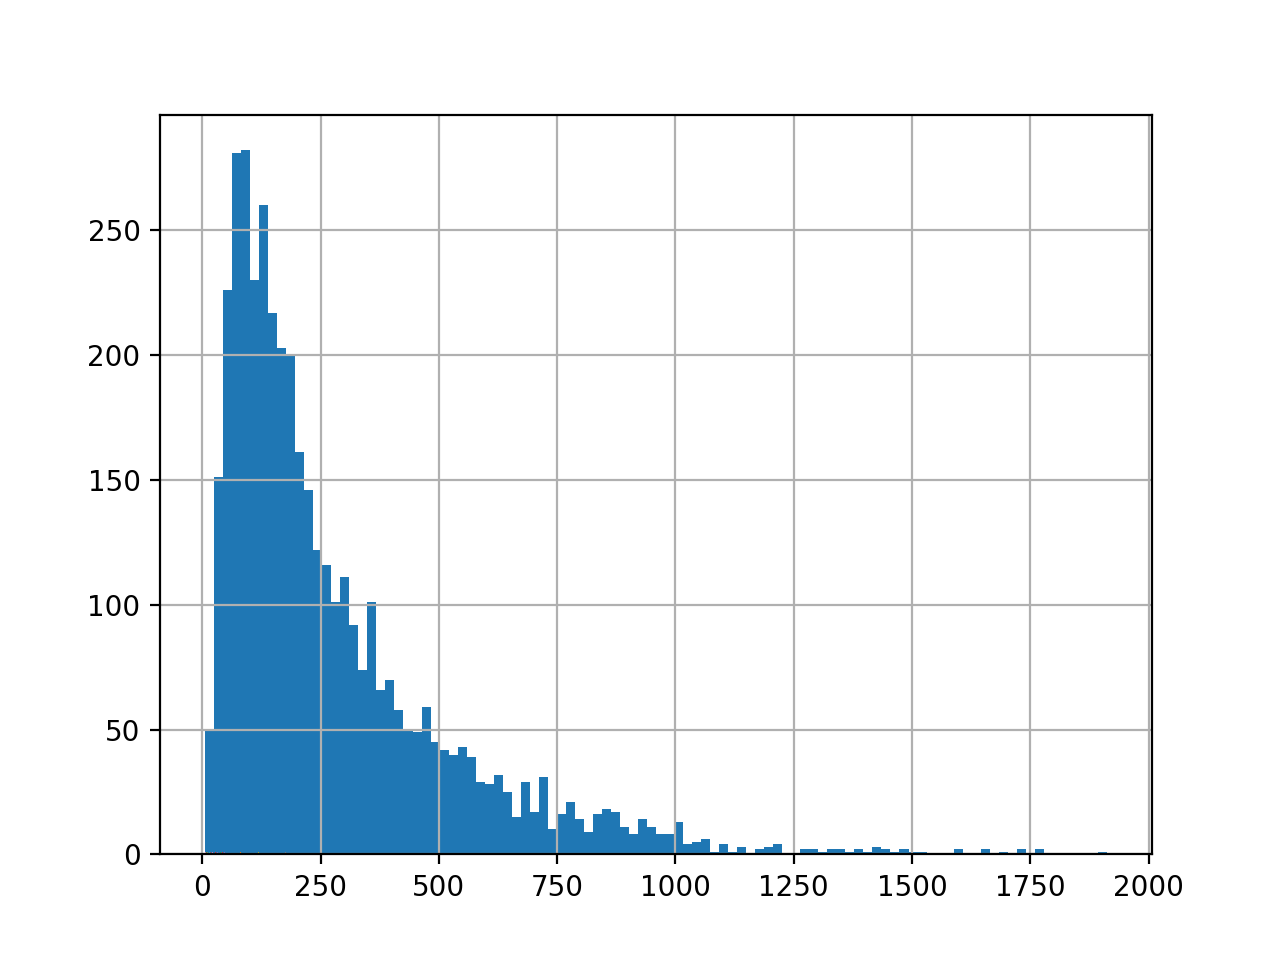

In [31]:
test.counts.hist(bins=100)

In [86]:
# Read the multiseq barcode whitelist
import pandas as pd
wl = pd.read_csv('LMOlist.csv', header=None)
wl.columns = ['a','b']
mswhite = wl.a.tolist()

In [88]:
from tqdm.notebook import tqdm

# Flatten reads for each cell based on umi (should only have one read per umi)
newCells = {}
for cellid in tqdm(cells):
    cell = cells[cellid]
    umis = []
    firstUniqueReads = []
    for read in cell:
        if read['umi'] not in umis:
            firstUniqueReads.append(read)
            umis.append(read['umi'])
    newCells[cellid] = firstUniqueReads
cells = newCells

In [89]:

cellBarcodes = {}
for cellid in tqdm(cells):
    cell = cells[cellid]
    ms = {} # multiseq barcodes
    for read in cell:
        if read['multiseq'] in mswhite:
            if read['multiseq'] in ms:
                ms[read['multiseq']] = ms[read['multiseq']] + 1
            else:
                ms[read['multiseq']] = 1
    cellBarcodes[cellid] = ms

In [90]:
cellBarcodes

{'GGATGTTCAGTACACT': {'GCCAGTTA': 81, 'CACTGTAG': 7},
 'TTAGGACCAATGGAGC': {'TGCCGTGG': 228, 'CACTGTAG': 11, 'GCCAGTTA': 1},
 'CGCTGGAAGCTCTCGG': {'CACTGTAG': 839, 'TGCCGTGG': 4, 'GCCAGTTA': 4},
 'TACGGATAGGCGATAC': {'CACTGTAG': 296, 'GCCAGTTA': 2},
 'CCTAAAGGTGCTTCTC': {'TGCCGTGG': 473, 'CACTGTAG': 12, 'GCCAGTTA': 1},
 'TCATTACCACTTCGAA': {'CACTGTAG': 227, 'TGCCGTGG': 3, 'GCCAGTTA': 1},
 'ACCGTAAGTAGCTTGT': {'CACTGTAG': 207, 'TGCCGTGG': 2, 'GCCAGTTA': 1},
 'GATTCAGCAGGTTTCA': {'TGCCGTGG': 208, 'GCCAGTTA': 2, 'CACTGTAG': 2},
 'TGCGCAGTCATGCTCC': {'GCCAGTTA': 2, 'TGCCGTGG': 123, 'CACTGTAG': 5},
 'AGCGGTCGTAGTACCT': {'CACTGTAG': 405, 'GCCAGTTA': 10, 'TGCCGTGG': 4},
 'CTGAAGTTCCAAACAC': {'TGCCGTGG': 241, 'GCCAGTTA': 6, 'CACTGTAG': 9},
 'ATAAGAGGTCCCTACT': {'CACTGTAG': 334, 'GCCAGTTA': 1, 'TGCCGTGG': 1},
 'CGATTGACAAGAGGCT': {'CACTGTAG': 685, 'TGCCGTGG': 3, 'GCCAGTTA': 1},
 'AGCGGTCTCTGTCTCG': {'CACTGTAG': 651, 'TGCCGTGG': 3, 'GCCAGTTA': 5},
 'ACCTTTAAGAAACGAG': {'GCCAGTTA': 77, 'CACTGTAG'

<IPython.core.display.Javascript object>


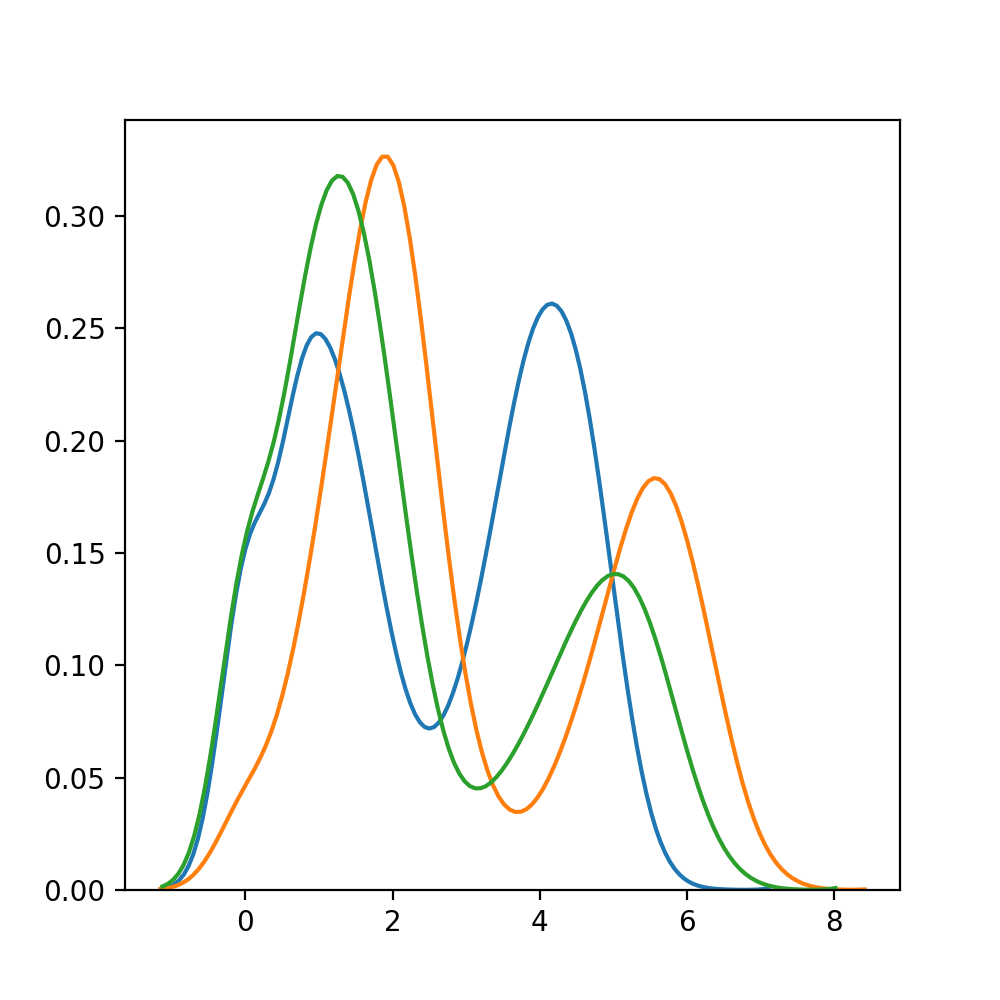

GCCAGTTA
CACTGTAG
TGCCGTGG


In [91]:
# for barcode GCCAGTTA, see how many counts there are 
import seaborn as sns
%matplotlib notebook

targets = ['GCCAGTTA','CACTGTAG','TGCCGTGG']
f, ax = plt.subplots(figsize=(5, 5))

for target in targets:
    print(target) 
    counts = []
    for cell in cellBarcodes:
        barcodes = cellBarcodes[cell]
        for barcode in barcodes:
            if barcode == target:
                counts.append([barcodes[barcode]])

    df = pd.DataFrame({'counts':counts})            
    x = df.counts.tolist()
    x = [np.log(i[0]) for i in x]
#     ax.set(xscale="log", yscale="linear")

    sns.kdeplot(x)

In [67]:
# Want to filter for doublets by checking for cells where there are two multiseq ids above threshold


<IPython.core.display.Javascript object>


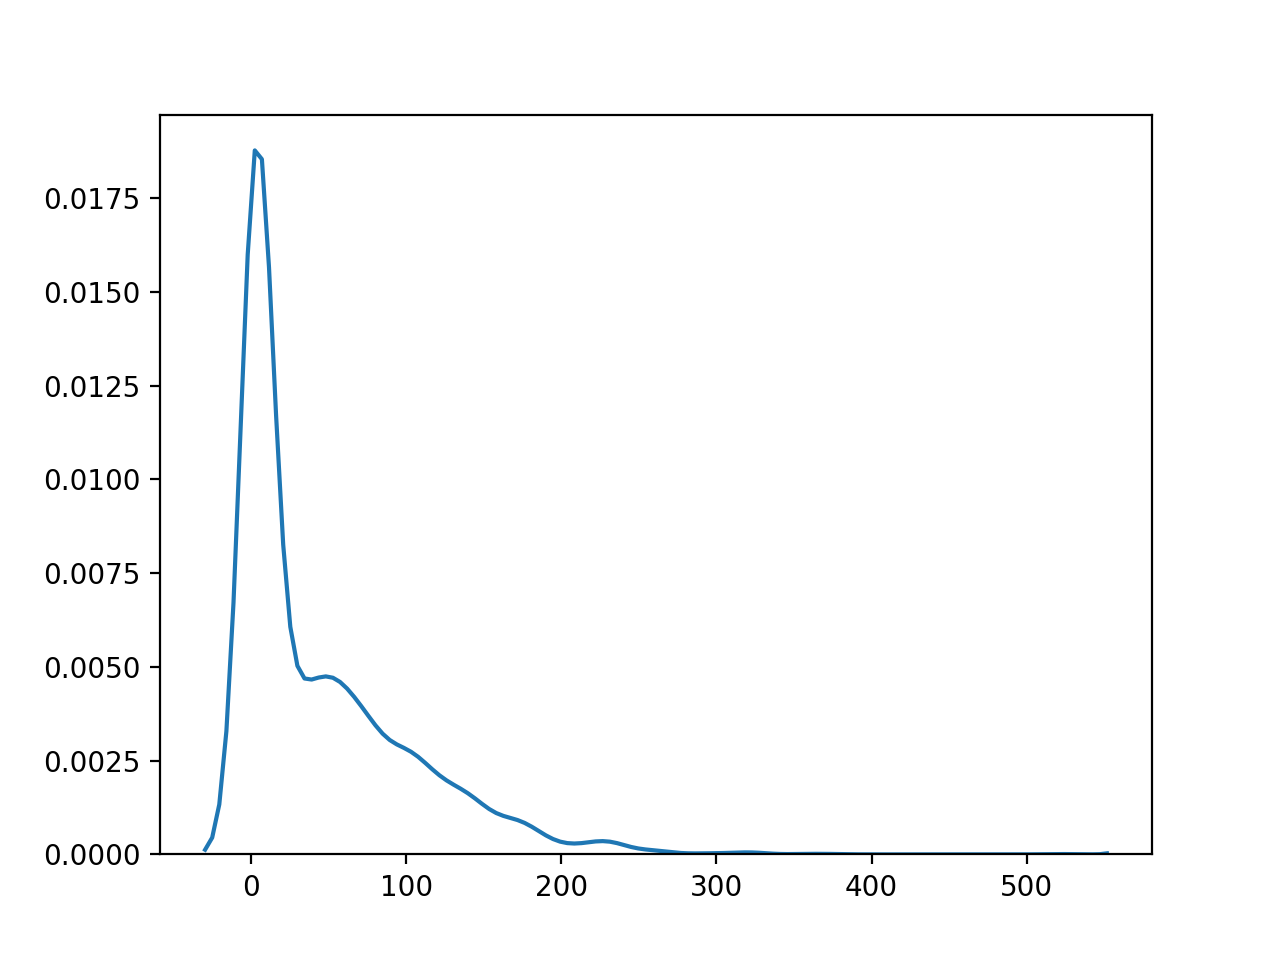